In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Считаем данные

In [8]:
data_train = pd.read_csv("./Data/x_train.csv", delimiter=';', header=None)
target_train = pd.read_csv("./Data/y_train.csv", delimiter=';', header=None)

In [9]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,0.320294,0.789564,0.305234,0.569579,0.916917,0.710729,0.502887,0.123825,1.549114,1.012985,...,3.905776,0.050249,1.652129,0.348495,1.268308,1.692855,10.972974,-34.651392,5.635283,-0.965972
1,-1.047974,0.098152,4.709796,0.063126,0.432243,0.638654,0.694468,0.791365,2.992625,-1.166921,...,4.822711,0.355136,3.810700,3.247255,-1.554161,2.506891,17.714096,12.537078,0.709831,0.337938
2,-0.488228,0.209715,1.328547,0.577500,0.454313,0.932798,0.470434,0.579927,4.157941,-0.076968,...,4.699418,0.136547,2.722004,0.794660,0.529090,5.016028,23.457600,39.258455,5.358375,1.034913
3,1.191010,1.005726,0.644007,0.021036,0.737313,0.225796,0.648582,0.334123,2.632267,-0.160811,...,4.860352,0.262532,1.703520,0.671193,-0.411733,2.358890,2.645531,16.002217,2.486295,0.434648
4,2.186114,1.327732,9.758608,-0.188493,0.036524,0.431486,0.494194,0.501352,3.486749,-0.580023,...,2.856243,0.701544,5.154188,19.887777,0.596292,10.548786,-2.565012,33.901742,4.573770,0.901521


In [17]:
np.unique(target_train, return_counts=True)

(array([0, 1, 2, 3, 4]), array([ 111, 1171, 1502,  594,  111]))

In [22]:
y = np.array(target_train)

### 2. Посмотрим на RF на сырых данных

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [26]:
def get_accuracies(X, Y):
    rf_clf = RandomForestClassifier(n_estimators=100)
    print("Accuracy: {0}".format(cross_val_score(rf_clf, X, Y, scoring='accuracy', cv=5, n_jobs=-1)))

In [27]:
get_accuracies(data_train, y)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 

Accuracy: [0.55777461 0.57163324 0.55236729 0.54232425 0.54454023]


### 3. Feature processing

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [33]:
X = data_train.copy()

In [44]:
def plot_importance(clf, X):
    importances = clf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(20, 8))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices])
    plt.xlim([-1, X.shape[1]])
    plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


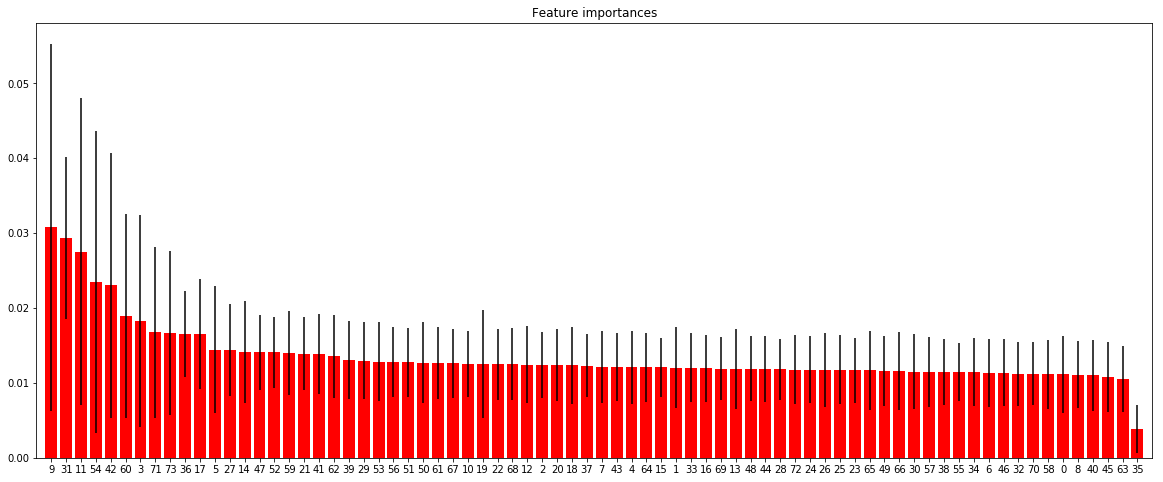

In [45]:
rf_clf = RandomForestClassifier(n_estimators=100).fit(X, y)
plot_importance(rf_clf, X)

In [42]:
from sklearn.feature_selection import SelectFromModel

In [43]:
model = SelectFromModel(rf_clf, prefit=True)
X_sfm = model.transform(X)
X_sfm.shape

(3489, 16)

In [48]:
get_accuracies(X_sfm, y)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expe

Accuracy: [0.55064194 0.59885387 0.56527977 0.54806313 0.57327586]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal number of features : 39


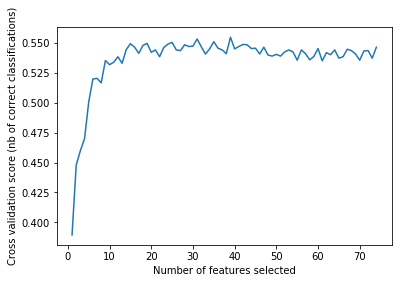

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Create the RFE object and compute a cross-validated score.
rf_clf = RandomForestClassifier(n_estimators=100)
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=rf_clf, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [36]:
X_rfecv = rfecv.transform(X)

In [37]:
get_accuracies(X_rfecv, y)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 

Accuracy: [0.56633381 0.59312321 0.57388809 0.53945481 0.57183908]
